## 웹 스크랩핑 실습 및 csv 파일 작성과 이미지 스크랩핑 

In [8]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
from urllib.request import urlopen
from urllib.error import HTTPError
from urllib.error import URLError

In [9]:
url = 'https://www.imdb.com/title/tt4154756/reviews?ref_=tt_ql_3'

try :
    html = urlopen(url)
except HTTPError as he :
    print('http error')
except URLError as ue :
    print('url error')
else :
    soup = BeautifulSoup(html.read(), 'html.parser',from_encoding='utf-8')

- 점수(별점),리뷰제목,작성자 닉네임,작성날짜,리뷰내용

In [11]:
review_list=soup.find_all('div',{'class':'imdb-user-review'})
review_list

[<div class="lister-item mode-detail imdb-user-review collapsable" data-review-id="rw5504583" data-vote-url="/title/tt4154756/review/rw5504583/vote/interesting">
 <div class="review-container">
 <div class="lister-item-content">
 <div class="ipl-ratings-bar">
 <span class="rating-other-user-rating">
 <svg class="ipl-icon ipl-star-icon " fill="#000000" height="24" viewbox="0 0 24 24" width="24" xmlns="http://www.w3.org/2000/svg">
 <path d="M0 0h24v24H0z" fill="none"></path>
 <path d="M12 17.27L18.18 21l-1.64-7.03L22 9.24l-7.19-.61L12 2 9.19 8.63 2 9.24l5.46 4.73L5.82 21z"></path>
 <path d="M0 0h24v24H0z" fill="none"></path>
 </svg>
 <span>9</span><span class="point-scale">/10</span>
 </span>
 </div>
 <a class="title" href="/review/rw5504583/"> Great
 </a> <div class="display-name-date">
 <span class="display-name-link"><a href="/user/ur87850731/">MR_Heraclius</a></span><span class="review-date">23 February 2020</span>
 </div>
 <div class="content">
 <div class="text show-more__control">

자연어 처리 기초
- 꼬고마
- 한나눔
- 트위터

In [12]:
from konlpy.tag import Kkma

ModuleNotFoundError: No module named 'jpype'

In [14]:
kkoma = Kkma()

NameError: name 'Kkma' is not defined

In [28]:
kkoma.nouns()

NameError: name 'kkoma' is not defined

In [29]:
from wordcloud import WordCloud, STOPWORDS

In [30]:
import numpy as np
from PIL import Image

In [35]:
text = open('C:/Users/mgk04.DESKTOP-8Q51H2D/driver/07. alice.txt').read()

In [38]:
alice_mask = np.array(Image.open('./images/07. alice_mask.png'))

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline

# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc
# plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

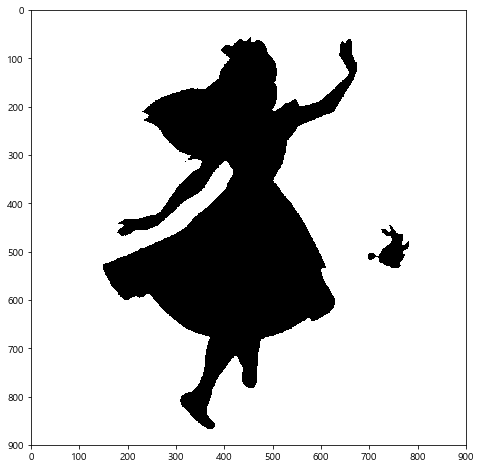

In [40]:
# 앨리스 그림 모양
plt.figure(figsize=(8,8))
plt.imshow(alice_mask,cmap=plt.cm.gray)
plt.show()

In [41]:
# 불용어 만들기(추가)
sw = set(STOPWORDS)
sw.add('said')

In [42]:
wc = WordCloud(background_color = 'white', max_words = 2000, mask = alice_mask, stopwords = sw)

In [43]:
wc = wc.generate(text)
wc.words_

{'Alice': 1.0,
 'little': 0.29508196721311475,
 'one': 0.27595628415300544,
 'know': 0.2459016393442623,
 'went': 0.226775956284153,
 'thing': 0.2185792349726776,
 'time': 0.2103825136612022,
 'Queen': 0.20765027322404372,
 'see': 0.1830601092896175,
 'King': 0.17486338797814208,
 'well': 0.1721311475409836,
 'now': 0.16393442622950818,
 'head': 0.16393442622950818,
 'began': 0.15846994535519127,
 'way': 0.1557377049180328,
 'Hatter': 0.1557377049180328,
 'Mock Turtle': 0.15300546448087432,
 'say': 0.15027322404371585,
 'Gryphon': 0.15027322404371585,
 'think': 0.1448087431693989,
 'quite': 0.14207650273224043,
 'much': 0.13934426229508196,
 'first': 0.13934426229508196,
 'thought': 0.1366120218579235,
 'go': 0.1366120218579235,
 'come': 0.13114754098360656,
 'never': 0.1284153005464481,
 'voice': 0.12568306010928962,
 'looked': 0.12295081967213115,
 'got': 0.12295081967213115,
 'must': 0.12021857923497267,
 'Cat': 0.12021857923497267,
 'Mouse': 0.12021857923497267,
 'Duchess': 0.11475

- 점수(별점),리뷰제목,작성자 닉네임, 작성날짜, 리뷰냉ㅇ
- 감정분석(YADER)-NLTK
- good +0.1, awful-0.1 perfect+0.2
- 문장에서 저런단어가 추출되면 나올 때 마다 점수를 더하고 빼서 점수 양수면 긍정, 음수면 부정 평가하기

In [1]:
from nltk import tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

C:\Users\mgk04.DESKTOP-8Q51H2D\Anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[nltk_data] Downloading package vader_lexicon to C:\Users\mgk04.DESKTO
[nltk_data]     P-8Q51H2D\AppData\Roaming\nltk_data...


In [7]:
data = []
sum_review = ''

for review in review_list :
    score = review.find('span').get_text().replace('\n', '')
    # print(score)
    title = review.find('a').get_text().replace('\n', '')
    # print(title)
    writer = review.find('span', 'display-name-link').get_text()
    # print(writer)
    date = review.find('span', 'review-date').get_text()
    # print(date)
    content = review.find('div', 'show-more__control').get_text()
    # print(content)
    # print()
    
    sum_review = sum_review + content
    lines_list = tokenize.sent_tokenize(content)
    sum = 0
    
    # polarity_scores() : 문장을 단어별로 분석해서 긍정, 부정, 중립에 대한 점수를 계산하고 종합 점수를 반환
    for sent in lines_list :
        ss = sid.polarity_scores(sent)
        sum = sum + ss['compound']
    
    sum1 = str(sum / len(lines_list))
    data.append([score, title, writer, date, content, sum1])


NameError: name 'review_list' is not defined

NameError: name 'lines_list' is not defined